Johnson & Johnson Time Series Forecasting (ARIMA Model Case Study)

Dataset Information:
Period: 1960-01 to 1980-10
Number of observations: 84
            Sales
date             
1960-01-01   0.71
1960-04-01   0.63
1960-07-02   0.85
1960-10-01   0.44
1961-01-01   0.61


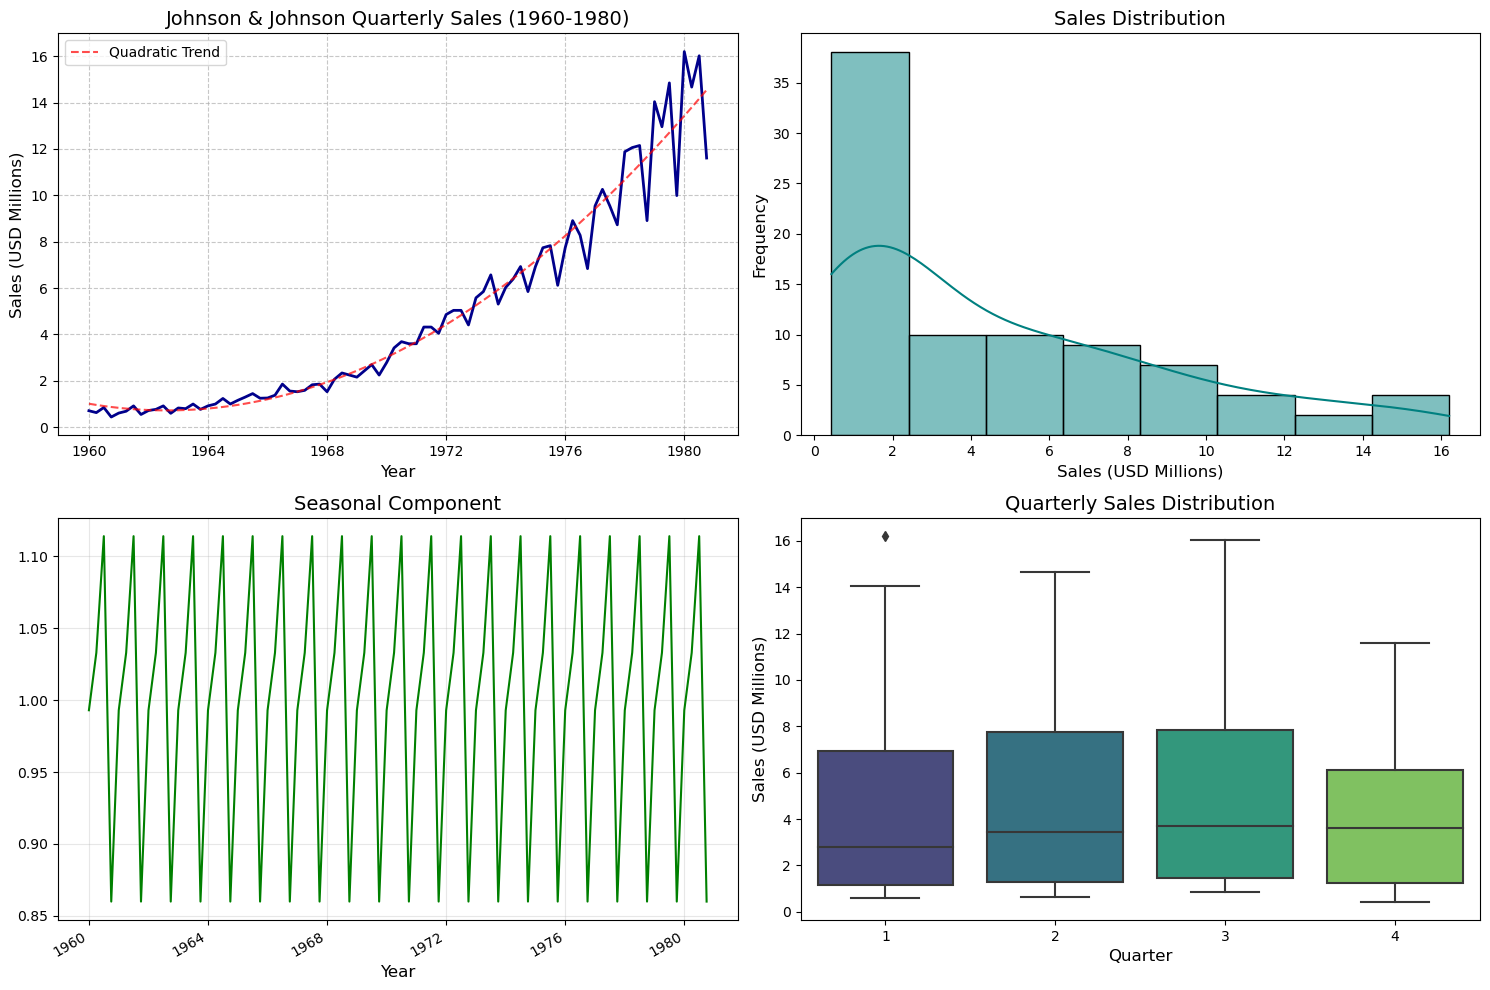


Stationarity Analysis:
Original Data:


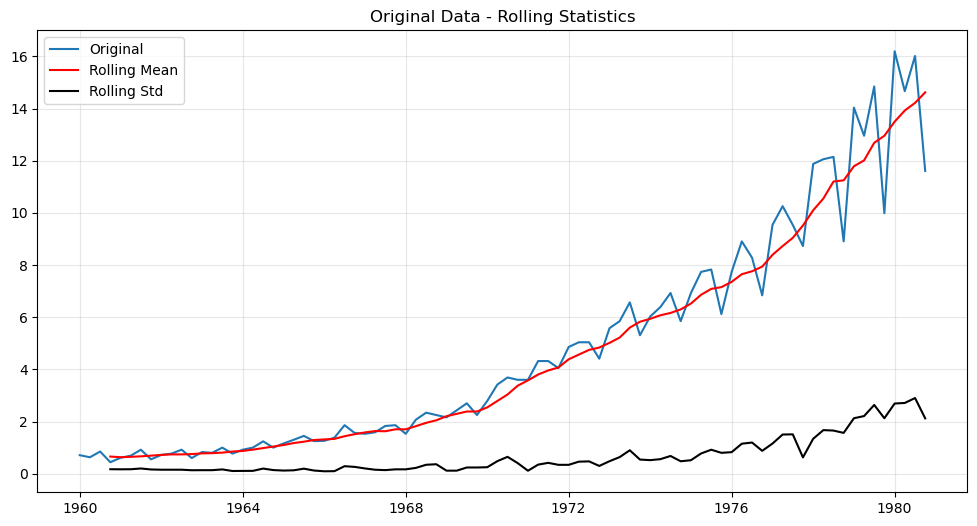

ADF Test for Original Data:
  ADF Statistic: 2.7420
  p-value: 1.0000
  Critical Values:
    1%: -3.5246
    5%: -2.9026
    10%: -2.5887

Log-Transformed Data:


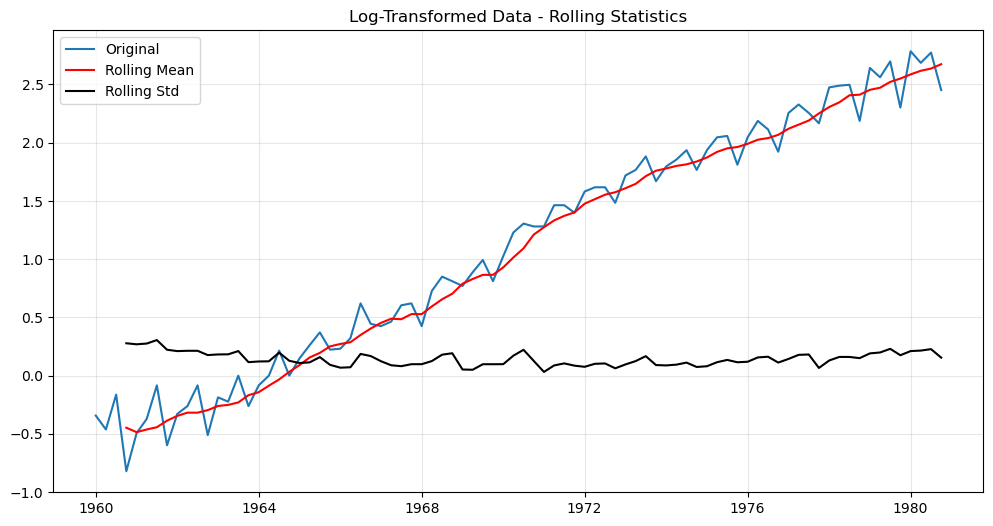

ADF Test for Log-Transformed Data:
  ADF Statistic: -0.8041
  p-value: 0.8179
  Critical Values:
    1%: -3.5160
    5%: -2.8989
    10%: -2.5867

First Difference of Log-Transformed Data:


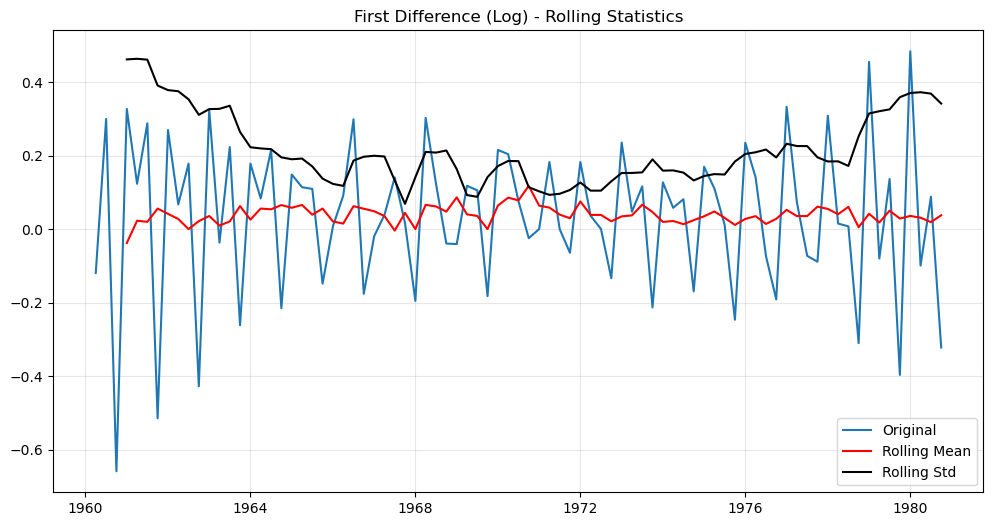

ADF Test for First Difference (Log):
  ADF Statistic: -4.3170
  p-value: 0.0004
  Critical Values:
    1%: -3.5183
    5%: -2.8999
    10%: -2.5872

Seasonal Difference (Annual) of Log-Transformed Data:


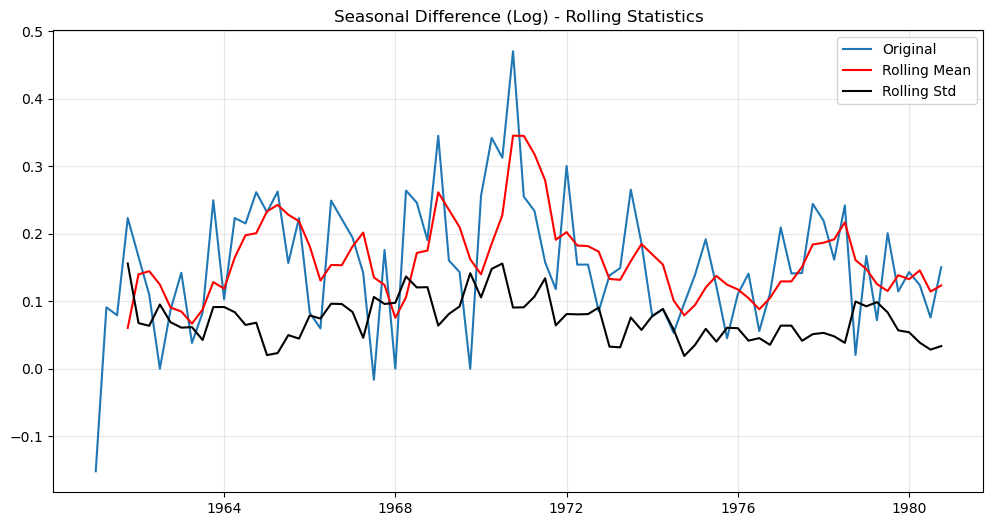

ADF Test for Seasonal Difference (Log):
  ADF Statistic: -3.1575
  p-value: 0.0226
  Critical Values:
    1%: -3.5207
    5%: -2.9009
    10%: -2.5878


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore') 

# Load and prepare data
sales_data = pd.read_csv('jj.csv', parse_dates=['date'])
sales_data = sales_data.set_index('date')
sales_data = sales_data.rename(columns={'data': 'Sales'})
print("Dataset Information:")
print(f"Period: {sales_data.index.min().strftime('%Y-%m')} to {sales_data.index.max().strftime('%Y-%m')}")
print(f"Number of observations: {len(sales_data)}")
print(sales_data.head())

# EDA Visualizations
plt.figure(figsize=(15, 10))

# Time series plot with trend line
plt.subplot(2, 2, 1)
plt.plot(sales_data.index, sales_data['Sales'], color='darkblue', linewidth=2)
plt.title('Johnson & Johnson Quarterly Sales (1960-1980)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (USD Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add trend line (polynomial fit)
z = np.polyfit(range(len(sales_data)), sales_data['Sales'], 2)
p = np.poly1d(z)
plt.plot(sales_data.index, p(range(len(sales_data))), 'r--', alpha=0.7, 
         label='Quadratic Trend')
plt.legend()

# Distribution plot
plt.subplot(2, 2, 2)
sns.histplot(sales_data['Sales'], kde=True, color='teal')
plt.title('Sales Distribution', fontsize=14)
plt.xlabel('Sales (USD Millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Seasonal decomposition
plt.subplot(2, 2, 3)
result = seasonal_decompose(sales_data['Sales'], model='multiplicative', period=4)
result.seasonal.plot(color='green')
plt.title('Seasonal Component', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.grid(alpha=0.3)

# Quarterly sales boxplot
plt.subplot(2, 2, 4)
sales_data['Quarter'] = sales_data.index.quarter
sns.boxplot(x='Quarter', y='Sales', data=sales_data, palette='viridis')
plt.title('Quarterly Sales Distribution', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales (USD Millions)', fontsize=12)

plt.tight_layout()
plt.show()

# Stationarity Analysis
def stationarity_test(series, name):
    """Perform ADF test and plot rolling statistics"""
    # Rolling statistics
    rolling_mean = series.rolling(window=4).mean()
    rolling_std = series.rolling(window=4).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='black')
    plt.legend()
    plt.title(f'{name} - Rolling Statistics')
    plt.grid(alpha=0.3)
    plt.show()
    
    # ADF test
    result = adfuller(series.dropna())
    print(f'ADF Test for {name}:')
    print(f'  ADF Statistic: {result[0]:.4f}')
    print(f'  p-value: {result[1]:.4f}')
    print('  Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value:.4f}')
    return result[1] < 0.05

print("\nStationarity Analysis:")
print("Original Data:")
stationary_original = stationarity_test(sales_data['Sales'], 'Original Data')

# Log transformation
sales_data['Log_Sales'] = np.log(sales_data['Sales'])
print("\nLog-Transformed Data:")
stationary_log = stationarity_test(sales_data['Log_Sales'], 'Log-Transformed Data')

# First difference
sales_data['Diff_Log_Sales'] = sales_data['Log_Sales'].diff().dropna()
print("\nFirst Difference of Log-Transformed Data:")
stationary_diff = stationarity_test(sales_data['Diff_Log_Sales'], 'First Difference (Log)')

# Seasonal difference (annual)
sales_data['Seasonal_Diff'] = sales_data['Log_Sales'].diff(4).dropna()
print("\nSeasonal Difference (Annual) of Log-Transformed Data:")
stationary_seasonal = stationarity_test(sales_data['Seasonal_Diff'], 'Seasonal Difference (Log)')

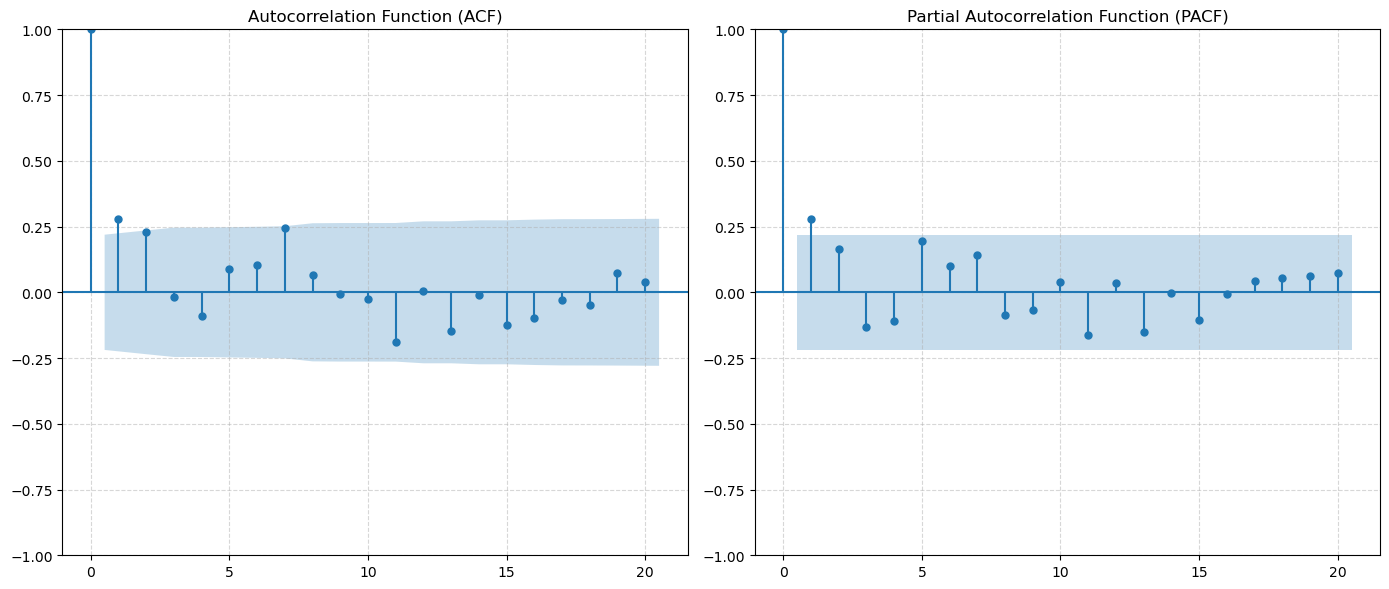

ARIMA(0,1,0) - AIC: -20.23
ARIMA(0,1,1) - AIC: -42.27
ARIMA(0,1,2) - AIC: -49.14
ARIMA(0,1,3) - AIC: -56.87
ARIMA(0,1,4) - AIC: -90.24
ARIMA(0,2,0) - AIC: 68.25
ARIMA(0,2,1) - AIC: -14.65
ARIMA(0,2,2) - AIC: -63.71
ARIMA(0,2,3) - AIC: -68.13
ARIMA(0,2,4) - AIC: -45.26
ARIMA(1,1,0) - AIC: -38.89
ARIMA(1,1,1) - AIC: -41.92
ARIMA(1,1,2) - AIC: -53.08
ARIMA(1,1,3) - AIC: -70.91
ARIMA(1,1,4) - AIC: -93.30
ARIMA(1,2,0) - AIC: 17.55
ARIMA(1,2,1) - AIC: -37.10
ARIMA(1,2,2) - AIC: -45.04
ARIMA(1,2,3) - AIC: -72.92
ARIMA(1,2,4) - AIC: -80.47
ARIMA(2,1,0) - AIC: -39.05
ARIMA(2,1,1) - AIC: -40.35
ARIMA(2,1,2) - AIC: -52.21
ARIMA(2,1,3) - AIC: -59.73
ARIMA(2,1,4) - AIC: -91.84
ARIMA(2,2,0) - AIC: 14.95
ARIMA(2,2,1) - AIC: -40.76
ARIMA(2,2,2) - AIC: -44.83
ARIMA(2,2,3) - AIC: -46.14
ARIMA(2,2,4) - AIC: -79.13
ARIMA(3,1,0) - AIC: -66.97
ARIMA(3,1,1) - AIC: -89.98
ARIMA(3,1,2) - AIC: -107.22
ARIMA(3,1,3) - AIC: -117.44
ARIMA(3,1,4) - AIC: -122.09
ARIMA(3,2,0) - AIC: -120.55
ARIMA(3,2,1) - AIC: -140.47

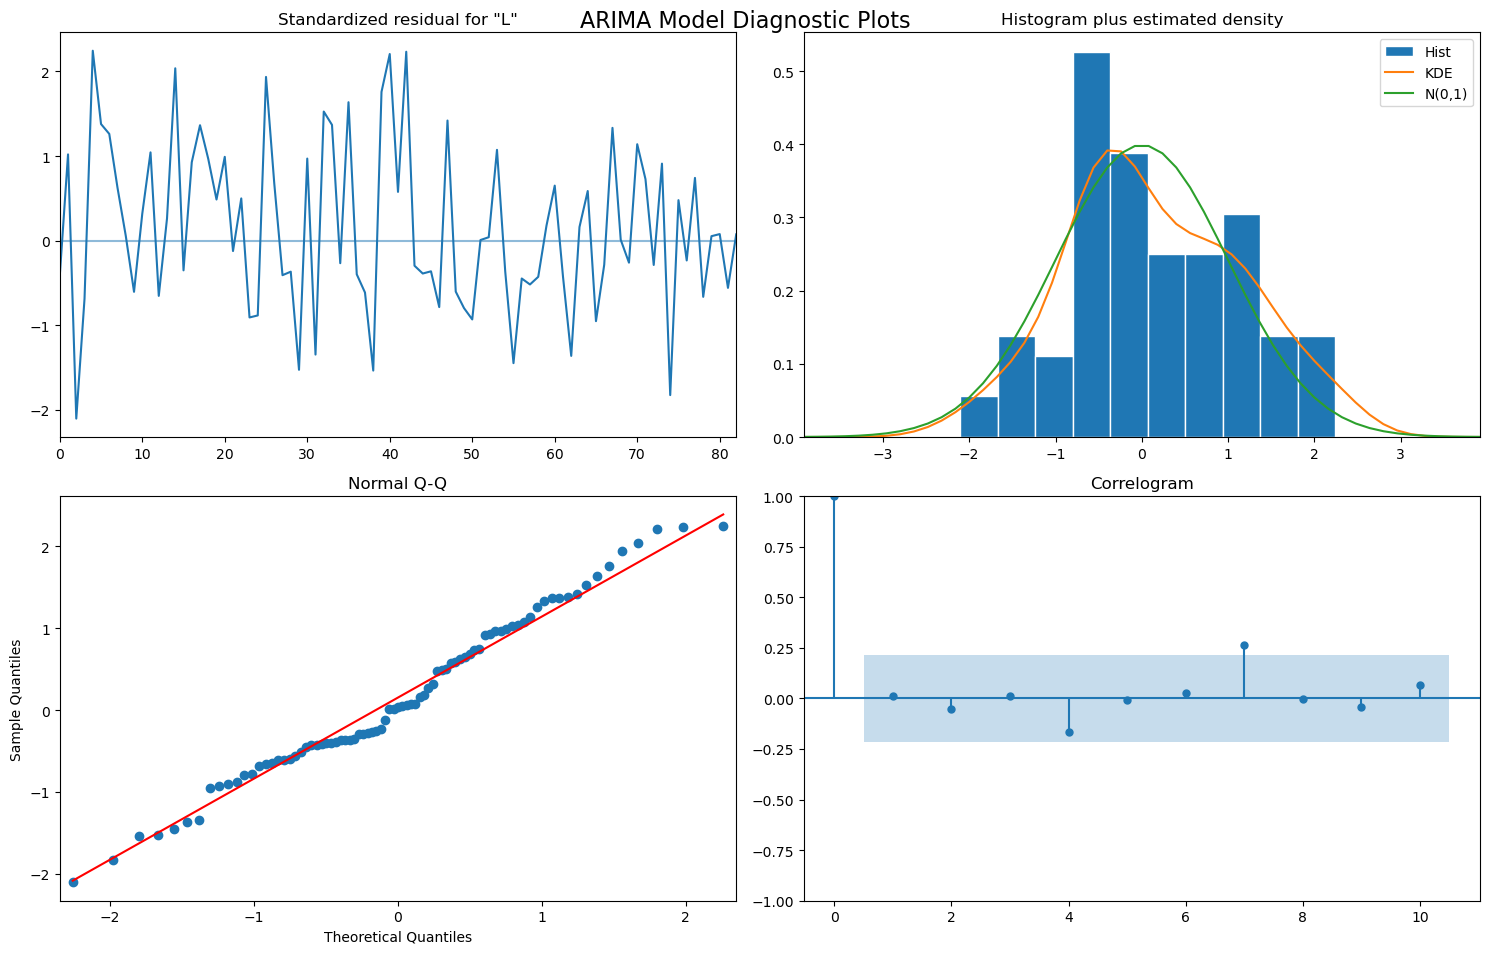


In-Sample Model Performance:
MAE: 0.2798
RMSE: 0.4040
MAPE: 8.21%


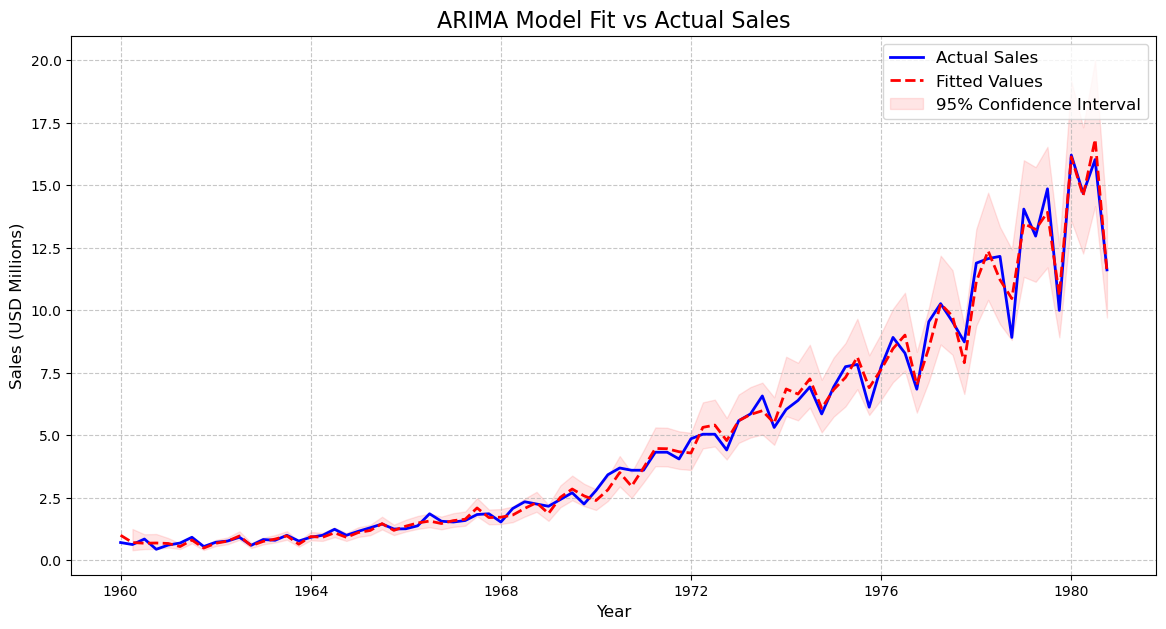

In [2]:
# ACF and PACF Analysis
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(sales_data['Seasonal_Diff'].dropna(), lags=20, ax=plt.gca(), 
         title='Autocorrelation Function (ACF)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(122)
plot_pacf(sales_data['Seasonal_Diff'].dropna(), lags=20, ax=plt.gca(), 
          title='Partial Autocorrelation Function (PACF)', method='ywm')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('jj_acf_pacf.png', dpi=300)
plt.show()

# Find Best ARIMA Model
def optimize_arima(series, p_range, d_range, q_range):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in range(p_range):
        for d in range(1, d_range+1):  # Start d from 1
            for q in range(q_range):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                        best_model = results
                    print(f"ARIMA({p},{d},{q}) - AIC: {results.aic:.2f}")
                except:
                    continue
    
    print(f"\nBest ARIMA Model: {best_order} with AIC: {best_aic:.2f}")
    return best_order, best_aic, best_model

# Use the seasonally differenced log-transformed series
best_order, best_aic, best_model = optimize_arima(sales_data['Log_Sales'], 5, 2, 5)
print(best_model.summary())

# Diagnostic Plots
best_model.plot_diagnostics(figsize=(15, 10))
plt.suptitle('ARIMA Model Diagnostic Plots', y=0.95, fontsize=16)
plt.tight_layout()
plt.savefig('jj_arima_diagnostics.png', dpi=300)
plt.show()

# In-Sample Evaluation
predictions = best_model.get_prediction(start=sales_data.index[0], dynamic=False)
predicted_log = predictions.predicted_mean
predicted_sales = np.exp(predicted_log)
actual_sales = sales_data['Sales']

# Calculate metrics
mae = mean_absolute_error(actual_sales, predicted_sales)
mse = mean_squared_error(actual_sales, predicted_sales)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_sales - predicted_sales) / actual_sales)) * 100

print("\nIn-Sample Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

# Visualization of in-sample fit
plt.figure(figsize=(14, 7))
plt.plot(actual_sales.index, actual_sales, 'b-', label='Actual Sales', linewidth=2)
plt.plot(predicted_sales.index, predicted_sales, 'r--', label='Fitted Values', linewidth=2)
plt.fill_between(predicted_sales.index, 
                 np.exp(predictions.conf_int().iloc[:, 0]),
                 np.exp(predictions.conf_int().iloc[:, 1]),
                 color='red', alpha=0.1, label='95% Confidence Interval')
plt.title('ARIMA Model Fit vs Actual Sales', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (USD Millions)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('jj_arima_fit.png', dpi=300)
plt.show()

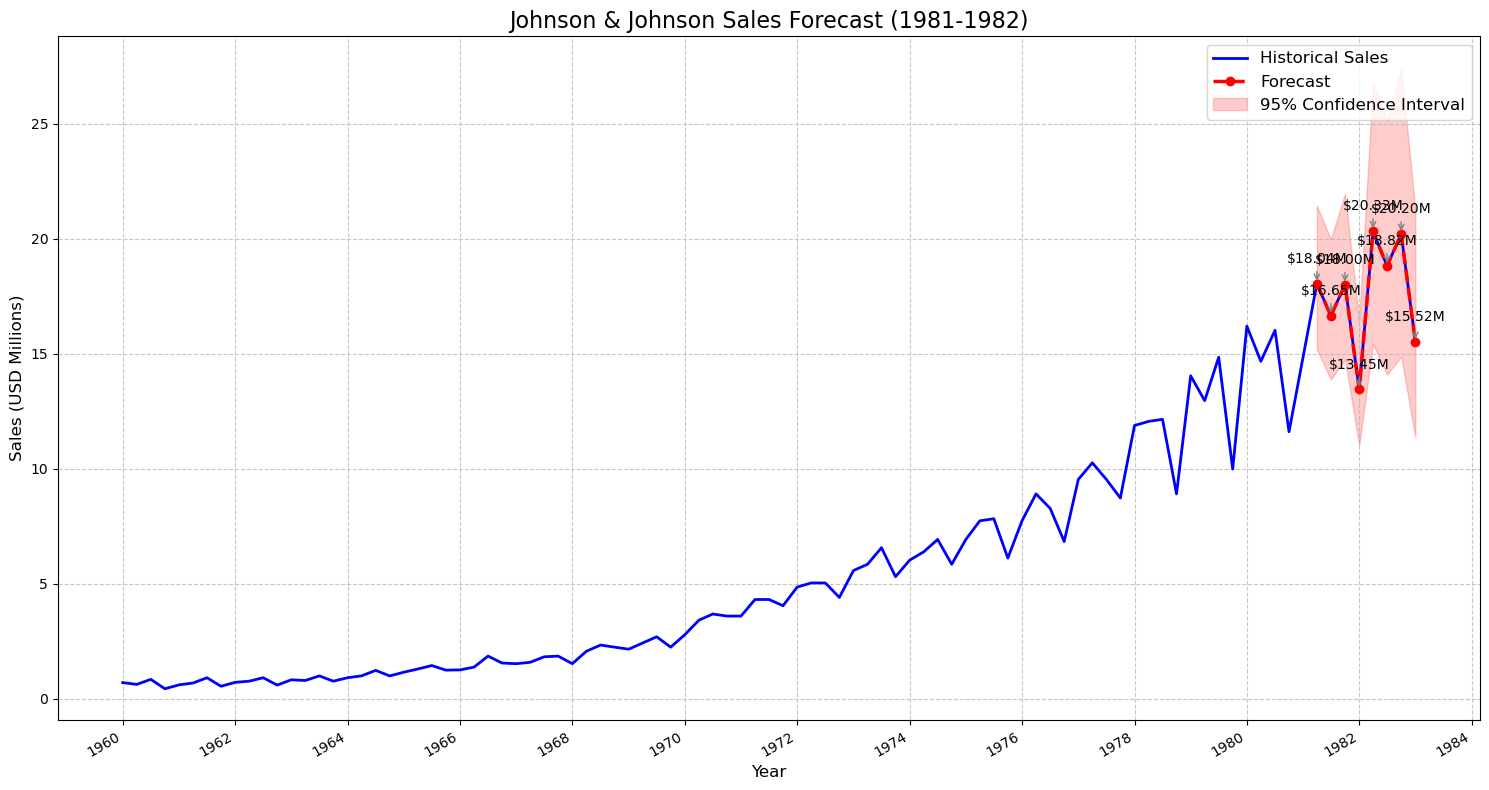


24-Month Sales Forecast:
         Date  Forecast (Millions)  Lower CI  Upper CI
84 1981-03-31                18.04     15.18     21.44
85 1981-06-30                16.65     13.88     19.97
86 1981-09-30                18.00     14.76     21.95
87 1981-12-31                13.45     11.01     16.44
88 1982-03-31                20.33     15.42     26.80
89 1982-06-30                18.82     14.10     25.11
90 1982-09-30                20.20     14.87     27.45
91 1982-12-31                15.52     11.36     21.21

Model Performance Summary:
Best ARIMA Order: (4, 1, 3)
AIC: -144.20
In-Sample MAE: 0.2798
In-Sample MAPE: 8.21%


In [3]:
# Forecast next 8 quarters
forecast_steps = 8
forecast_result = best_model.get_forecast(steps=forecast_steps)
forecast_log = forecast_result.predicted_mean
conf_int_log = forecast_result.conf_int()

# Convert to original scale
forecast_sales = np.exp(forecast_log)
conf_int_lower = np.exp(conf_int_log.iloc[:, 0])
conf_int_upper = np.exp(conf_int_log.iloc[:, 1])

# Create future dates
last_date = sales_data.index[-1]
forecast_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=3),
    periods=forecast_steps,
    freq='Q'
)

# Combine historical data with forecast
full_timeline = sales_data.index.union(forecast_dates)
full_sales = pd.Series(index=full_timeline, dtype=float)
full_sales.loc[sales_data.index] = sales_data['Sales']
full_sales.loc[forecast_dates] = forecast_sales.values

# Confidence intervals
conf_int_full = pd.DataFrame(index=full_timeline, columns=['lower', 'upper'])
conf_int_full.loc[sales_data.index] = np.nan
conf_int_full.loc[forecast_dates, 'lower'] = conf_int_lower.values
conf_int_full.loc[forecast_dates, 'upper'] = conf_int_upper.values

# Final visualization
plt.figure(figsize=(15, 8))
plt.plot(full_sales.index, full_sales, 'b-', label='Historical Sales', linewidth=2)
plt.plot(forecast_dates, forecast_sales, 'r--', label='Forecast', linewidth=2.5, marker='o')
plt.fill_between(forecast_dates, conf_int_lower, conf_int_upper, 
                 color='red', alpha=0.2, label='95% Confidence Interval')

# Formatting
plt.title('Johnson & Johnson Sales Forecast (1981-1982)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (USD Millions)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Add forecast values as text annotations
for i, (date, value) in enumerate(zip(forecast_dates, forecast_sales)):
    plt.annotate(f'${value:.2f}M', 
                 (date, value),
                 xytext=(0, 15), 
                 textcoords='offset points',
                 ha='center',
                 fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()
plt.savefig('jj_arima_forecast.png', dpi=300)
plt.show()

# Print forecast table
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast (Millions)': forecast_sales,
    'Lower CI': conf_int_lower,
    'Upper CI': conf_int_upper
})
print("\n24-Month Sales Forecast:")
print(forecast_df.round(2))

# Key Metrics Report
print("\nModel Performance Summary:")
print(f"Best ARIMA Order: {best_order}")
print(f"AIC: {best_aic:.2f}")
print(f"In-Sample MAE: {mae:.4f}")
print(f"In-Sample MAPE: {mape:.2f}%")

Johnson & Johnson Time Series Forecasting (LSTM and GRU Model Case Study)

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


# Load and prepare data
sales_data = pd.read_csv('jj.csv', parse_dates=['date'])
sales_data = sales_data.rename(columns={'data': 'Sales'})

# Prepare data for sequence modeling
def prepare_sequences(data, n_steps, test_size=8):
    """
    Prepare input sequences and targets for time series forecasting
    
    Parameters:
    data (pd.Series): Time series data
    n_steps (int): Number of time steps in input sequence
    test_size (int): Number of periods for test set
    
    Returns:
    tuple: Scaled training and test sequences, scalers
    """
    # Train-test split (last 8 quarters for testing)
    train = data.iloc[:-test_size]
    test = data.iloc[-test_size:]
    
    # Apply log transformation to stabilize variance
    train_log = np.log(train['Sales'])
    test_log = np.log(test['Sales'])
    
    # Seasonal differencing (annual)
    train_log_diff = train_log.diff(4).dropna()
    
    # Create sequences
    X_train, y_train = [], []
    for i in range(n_steps, len(train_log_diff)):
        X_train.append(train_log_diff.iloc[i-n_steps:i].values)
        y_train.append(train_log_diff.iloc[i])
    
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    # Scale features and targets separately
    X_scaler = MinMaxScaler(feature_range=(-1, 1))
    X_train_scaled = X_scaler.fit_transform(X_train)
    
    y_scaler = MinMaxScaler(feature_range=(-1, 1))
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
    
    # Reshape for LSTM/GRU [samples, timesteps, features]
    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], n_steps, 1))
    
    # Prepare test set initial sequence
    last_sequence = train_log_diff.iloc[-n_steps:].values.reshape(1, -1)
    last_sequence_scaled = X_scaler.transform(last_sequence)
    
    return (X_train_scaled, y_train_scaled, X_scaler, y_scaler, 
            last_sequence_scaled, train_log, test_log)

# Set parameters
n_steps = 8  # 2 years of quarterly data
test_size = 8  # Last 8 quarters for testing

# Prepare sequences
(X_train, y_train, X_scaler, y_scaler, 
 last_sequence, train_log, test_log) = prepare_sequences(sales_data, n_steps, test_size)

print(f"Training sequences: {X_train.shape}")
print(f"Training targets: {y_train.shape}")


Training sequences: (64, 8, 1)
Training targets: (64,)


LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,593 (463.25 KB)

 Trainable params: 118,593 (463.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.2136 - mae: 0.3755 - val_loss: 0.1823 - val_mae: 0.2710
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1602 - mae: 0.3226 - val_loss: 0.1581 - val_mae: 0.2641
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1686 - mae: 0.3328 - val_loss: 0.1590 - val_mae: 0.2495
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1297 - mae: 0.2919 - val_loss: 0.1557 - val_mae: 0.2420
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1534 - mae: 0.3024 - val_loss: 0.1570 - val_mae: 0.2461
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1345 - mae: 0.2984 - val_loss: 0.1587 - val_mae: 0.2504
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1654 - mae: 0.3251 - val_loss: 0.1592 - val_mae: 0.2489
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2010 - mae: 0.3622 - val_loss: 0.1553 - val_mae: 0.2437
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1365 - mae: 

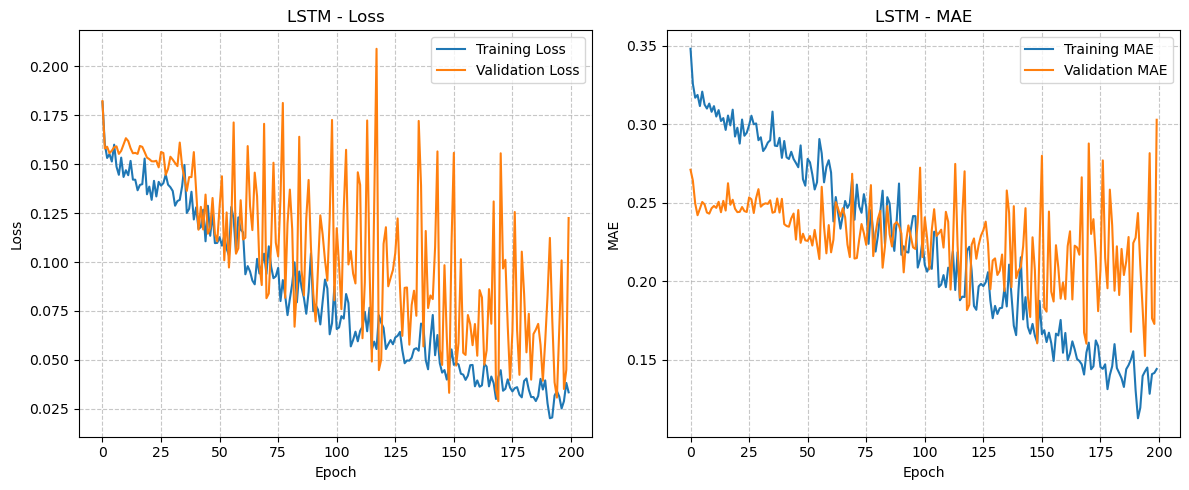

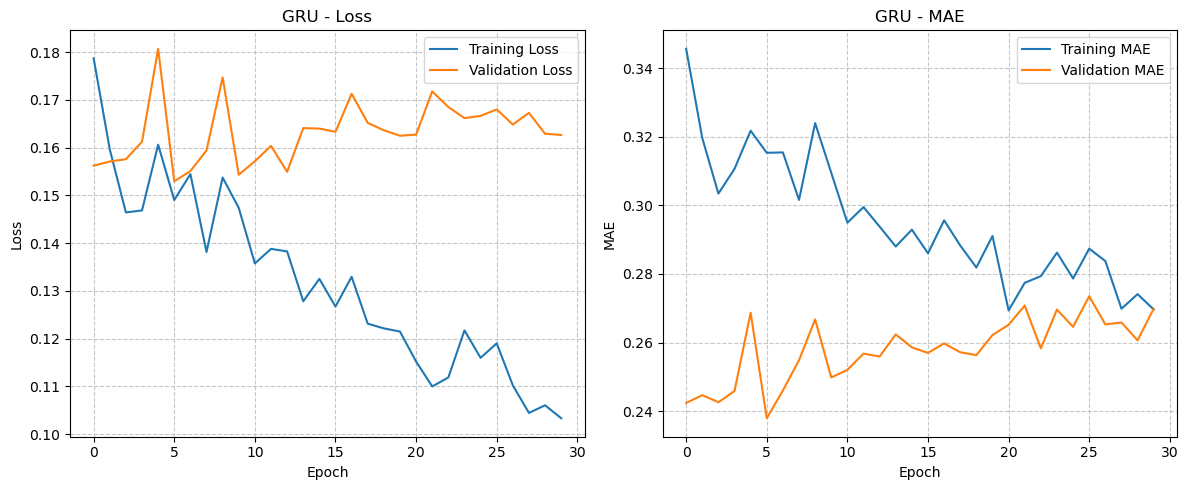

In [5]:
# Create LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Create GRU model
def create_gru_model(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Create models
lstm_model = create_lstm_model((n_steps, 1))
gru_model = create_gru_model((n_steps, 1))

print("LSTM Model Summary:")
lstm_model.summary()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=30, 
                           restore_best_weights=True, verbose=1)

# Train models
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=8,
    validation_split=0.15,
    callbacks=[early_stop],
    verbose=1
)

history_gru = gru_model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=8,
    validation_split=0.15,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f'jj_{title.lower()}_training.png', dpi=300)
    plt.show()

plot_training_history(history_lstm, 'LSTM')
plot_training_history(history_gru, 'GRU')

In [6]:
# Forecasting function
def forecast_sales(model, initial_sequence, X_scaler, y_scaler, 
                   steps, last_log_series, train_log):
    """
    Forecast sales using LSTM/GRU model with seasonal reconstruction
    
    Parameters:
    model (keras.Model): Trained LSTM or GRU model
    initial_sequence (np.array): Last sequence from training data
    X_scaler (MinMaxScaler): Scaler for input features
    y_scaler (MinMaxScaler): Scaler for targets
    steps (int): Number of steps to forecast
    last_log_series (pd.Series): Last year of log-transformed values
    train_log (pd.Series): Log-transformed training data
    
    Returns:
    np.array: Forecasted sales values
    """
    history = list(initial_sequence.flatten())
    predictions = []
    
    for _ in range(steps):
        # Prepare input
        X_input = np.array(history[-n_steps:]).reshape(1, -1)
        X_input_scaled = X_scaler.transform(X_input)
        X_input_scaled = X_input_scaled.reshape((1, n_steps, 1))
        
        # Predict next difference
        pred_diff_scaled = model.predict(X_input_scaled, verbose=0)[0][0]
        pred_diff = y_scaler.inverse_transform([[pred_diff_scaled]])[0][0]
        
        predictions.append(pred_diff)
        history.append(pred_diff)
    
    # Convert seasonal differences to absolute log values
    seasonal_base = last_log_series[-4:].values  # Last year of log values
    abs_log_predictions = []
    
    for i, diff in enumerate(predictions):
        if i < 4:
            base = seasonal_base[i]
        else:
            base = abs_log_predictions[i-4]
        abs_value = base + diff
        abs_log_predictions.append(abs_value)
    
    # Convert to original scale
    return np.exp(abs_log_predictions)

# Generate forecasts
lstm_forecast = forecast_sales(
    lstm_model, last_sequence, X_scaler, y_scaler, 
    test_size, train_log, train_log
)

gru_forecast = forecast_sales(
    gru_model, last_sequence, X_scaler, y_scaler, 
    test_size, train_log, train_log
)

# Prepare test data
test_dates = sales_data['date'].iloc[-test_size:]
test_sales = sales_data['Sales'].iloc[-test_size:].values

# Evaluate forecasts
def evaluate_forecast(name, actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return {
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': f"{mape:.2f}%",
        'Forecast': forecast
    }

lstm_results = evaluate_forecast('LSTM', test_sales, lstm_forecast)
gru_results = evaluate_forecast('GRU', test_sales, gru_forecast)

# Print evaluation
results_df = pd.DataFrame([lstm_results, gru_results]).drop('Forecast', axis=1)
print("\nModel Performance on Test Set:")
print(results_df)


Model Performance on Test Set:
  Model       MAE      RMSE    MAPE
0  LSTM  1.419032  1.773974  10.13%
1   GRU  1.854522  2.045083  12.93%


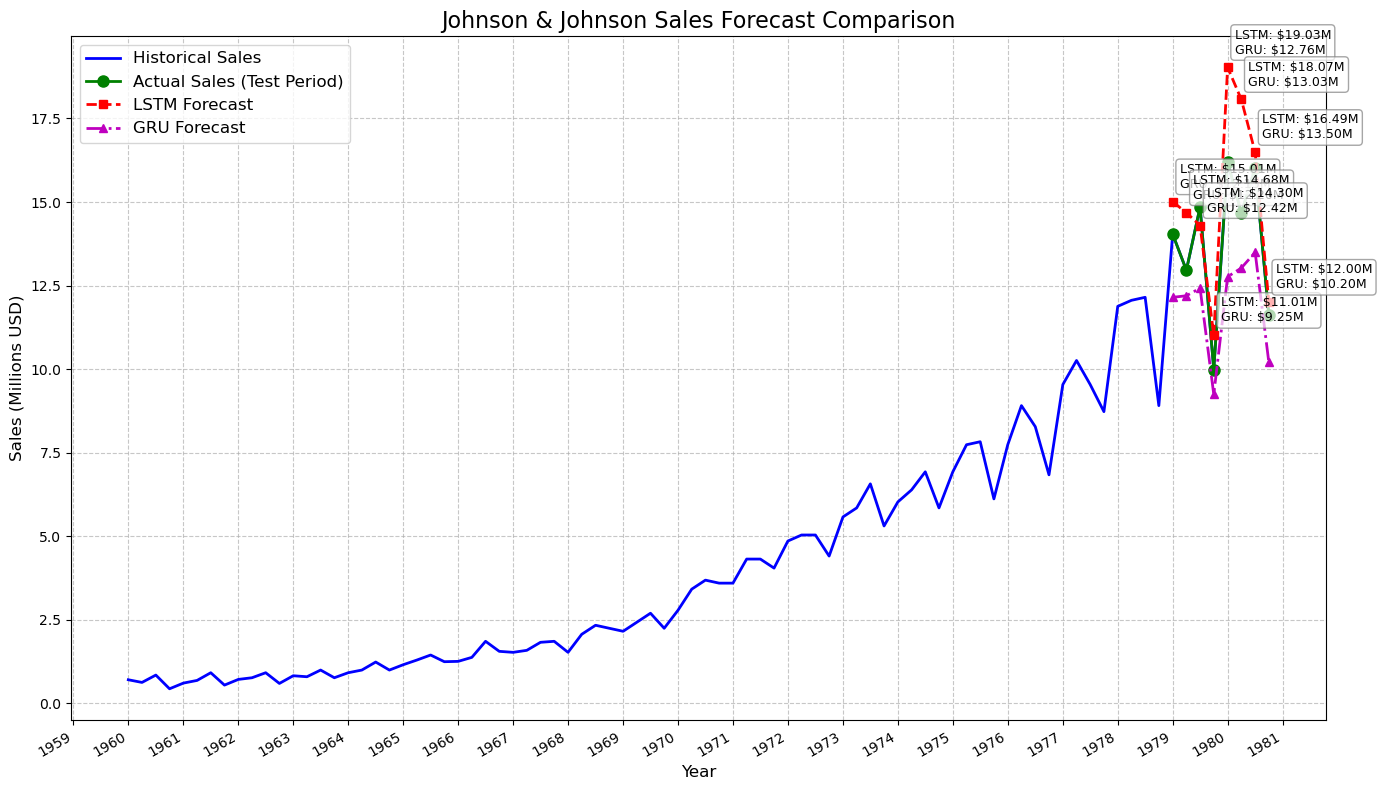

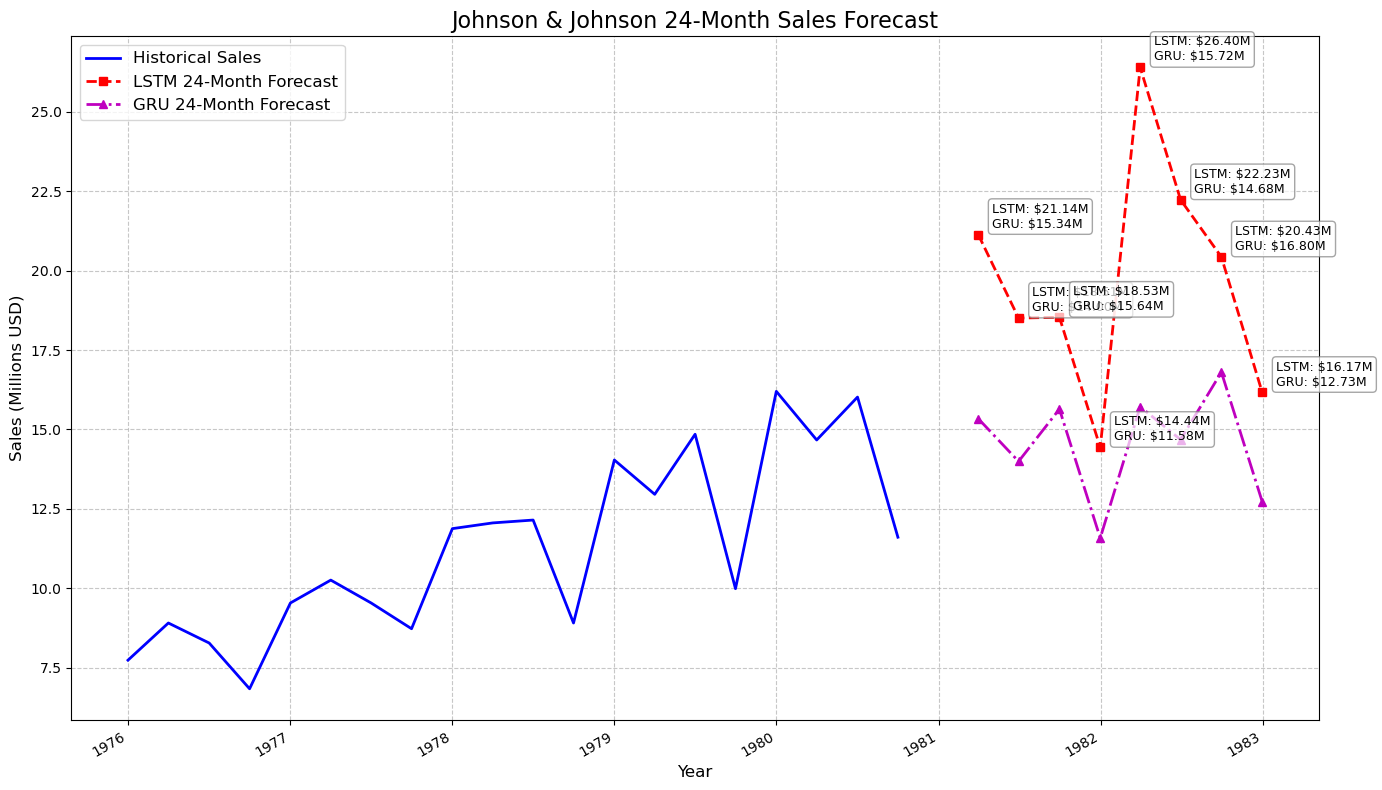

In [7]:
# Visualize forecasts
plt.figure(figsize=(14, 8))

# Full historical data
plt.plot(sales_data['date'], sales_data['Sales'], 
         'b-', label='Historical Sales', linewidth=2)

# Test period actuals
plt.plot(test_dates, test_sales, 
         'go-', label='Actual Sales (Test Period)', 
         markersize=8, linewidth=2)

# Forecasts
plt.plot(test_dates, lstm_forecast, 
         'r--', label='LSTM Forecast', 
         marker='s', markersize=6, linewidth=2)
plt.plot(test_dates, gru_forecast, 
         'm-.', label='GRU Forecast', 
         marker='^', markersize=6, linewidth=2)

# Formatting
plt.title('Johnson & Johnson Sales Forecast Comparison', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (Millions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Add forecast values
for i, date in enumerate(test_dates):
    plt.annotate(f'LSTM: ${lstm_forecast[i]:.2f}M\nGRU: ${gru_forecast[i]:.2f}M', 
                 (date, max(lstm_forecast[i], gru_forecast[i])),
                 xytext=(5, 10), 
                 textcoords='offset points',
                 fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

plt.tight_layout()
plt.show()

# Future forecast (next 24 months)
def forecast_future(model, initial_sequence, X_scaler, y_scaler, 
                    steps, last_log_series, train_log):
    """Forecast beyond test period"""
    # Forecast log differences
    history = list(initial_sequence.flatten())
    predictions = []
    
    for _ in range(steps):
        X_input = np.array(history[-n_steps:]).reshape(1, -1)
        X_input_scaled = X_scaler.transform(X_input)
        X_input_scaled = X_input_scaled.reshape((1, n_steps, 1))
        
        pred_diff_scaled = model.predict(X_input_scaled, verbose=0)[0][0]
        pred_diff = y_scaler.inverse_transform([[pred_diff_scaled]])[0][0]
        
        predictions.append(pred_diff)
        history.append(pred_diff)
    
    # Convert to absolute log values
    seasonal_base = last_log_series[-4:].values
    abs_log_predictions = []
    
    for i, diff in enumerate(predictions):
        if i < 4:
            base = seasonal_base[i]
        else:
            base = abs_log_predictions[i-4]
        abs_value = base + diff
        abs_log_predictions.append(abs_value)
    
    return np.exp(abs_log_predictions)

# Prepare final sequence using all data
full_log = np.log(sales_data['Sales'])
full_log_diff = full_log.diff(4).dropna()
final_seq = full_log_diff.iloc[-n_steps:].values.reshape(1, -1)
final_seq_scaled = X_scaler.transform(final_seq)

# Generate 24-month forecast
future_steps = 8  # 8 quarters = 24 months
lstm_future = forecast_future(
    lstm_model, final_seq_scaled, X_scaler, y_scaler, 
    future_steps, full_log, full_log
)

gru_future = forecast_future(
    gru_model, final_seq_scaled, X_scaler, y_scaler, 
    future_steps, full_log, full_log
)

# Create future dates
last_date = sales_data['date'].iloc[-1]
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=3),
    periods=future_steps,
    freq='Q'
)

# Plot future forecast
plt.figure(figsize=(14, 8))

# Last 5 years of historical data
recent_data = sales_data[sales_data['date'] >= pd.to_datetime('1976-01-01')]
plt.plot(recent_data['date'], recent_data['Sales'], 
         'b-', label='Historical Sales', linewidth=2)

# Future forecasts
plt.plot(future_dates, lstm_future, 
         'r--', label='LSTM 24-Month Forecast', 
         marker='s', markersize=6, linewidth=2)
plt.plot(future_dates, gru_future, 
         'm-.', label='GRU 24-Month Forecast', 
         marker='^', markersize=6, linewidth=2)

# Formatting
plt.title('Johnson & Johnson 24-Month Sales Forecast', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (Millions USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Add forecast values
for i, date in enumerate(future_dates):
    plt.annotate(f'LSTM: ${lstm_future[i]:.2f}M\nGRU: ${gru_future[i]:.2f}M', 
                 (date, max(lstm_future[i], gru_future[i])),
                 xytext=(10, 5), 
                 textcoords='offset points',
                 fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

plt.tight_layout()
plt.show()



Amazon Time Series Forecasting (ARIMA, LSTM and GRU Model Case Study)

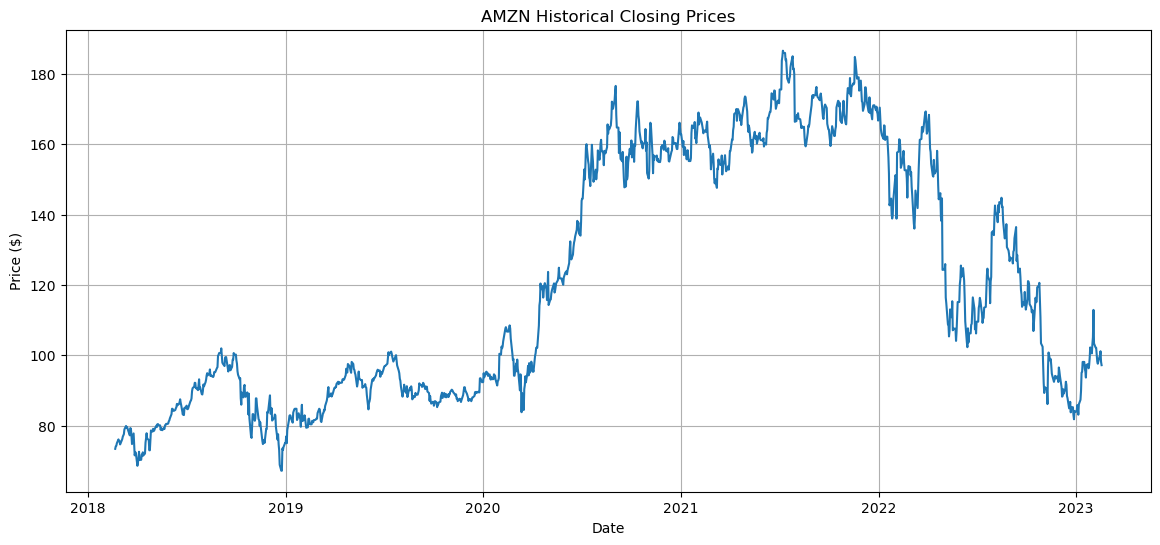

In [8]:
# Import Librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date')
df = df[['Close']].rename(columns={'Close': 'Price'})
df = df.asfreq('B')  # Business days frequency
df = df.fillna(method='ffill')  # Forward fill missing values

# Plot initial data
plt.figure(figsize=(14, 6))
plt.plot(df.Price)
plt.title('AMZN Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [9]:
# Stationarity check function
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')

# Check stationarity
print("Original Data Stationarity Test:")
adf_test(df.Price)

# Make data stationary
df['Price_diff'] = df.Price.diff().dropna()
print("\nDifferenced Data Stationarity Test:")
adf_test(df.Price_diff.dropna())


Original Data Stationarity Test:
ADF Statistic: -1.6556
p-value: 0.4541
Critical Values:
   1%: -3.4354
   5%: -2.8638
   10%: -2.5680

Differenced Data Stationarity Test:
ADF Statistic: -37.2102
p-value: 0.0000
Critical Values:
   1%: -3.4354
   5%: -2.8638
   10%: -2.5680


In [10]:
# Find best ARIMA parameters
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_order = None

for order in pdq:
    try:
        model = ARIMA(df.Price, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue
        
print(f'\nBest ARIMA Order: {best_order} | AIC: {best_aic:.2f}')


Best ARIMA Order: (2, 1, 2) | AIC: 6294.68


In [11]:
# Generate 24-month ARIMA forecast
final_arima = ARIMA(df.Price, order=best_order)
final_arima_results = final_arima.fit()
forecast_steps = 24 * 21  # 24 months with ~21 business days/month
arima_forecast = final_arima_results.get_forecast(steps=forecast_steps)
arima_mean = arima_forecast.predicted_mean
arima_conf = arima_forecast.conf_int()

In [12]:
# Preprocessing for RNN Networks(LSTM and GRU)
# Prepare data for neural networks
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Price']])

# Create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 60  # Using 3 months of historical data
X, y = create_sequences(scaled_data, n_steps)

In [13]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    LSTM(100, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train LSTM
lstm_model.fit(X, y, epochs=50, batch_size=64, verbose=1)

# Build GRU model
gru_model = Sequential([
    GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    GRU(100, activation='relu'),
    Dense(1)
])
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train GRU
gru_model.fit(X, y, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.1661
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0115
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0037
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0031
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0029
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0028
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0023
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0024
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0022
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0021
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0020
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0020
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0016
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0019
Epoch 15/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0019
Epo


Training Performance Metrics (Common Period):
   Model       MAE      RMSE     MAPE
0  ARIMA  1.883099  2.742357  1.5576%
1   LSTM  2.632392  3.584977  2.1822%
2    GRU  1.940014  2.804055  1.6036%


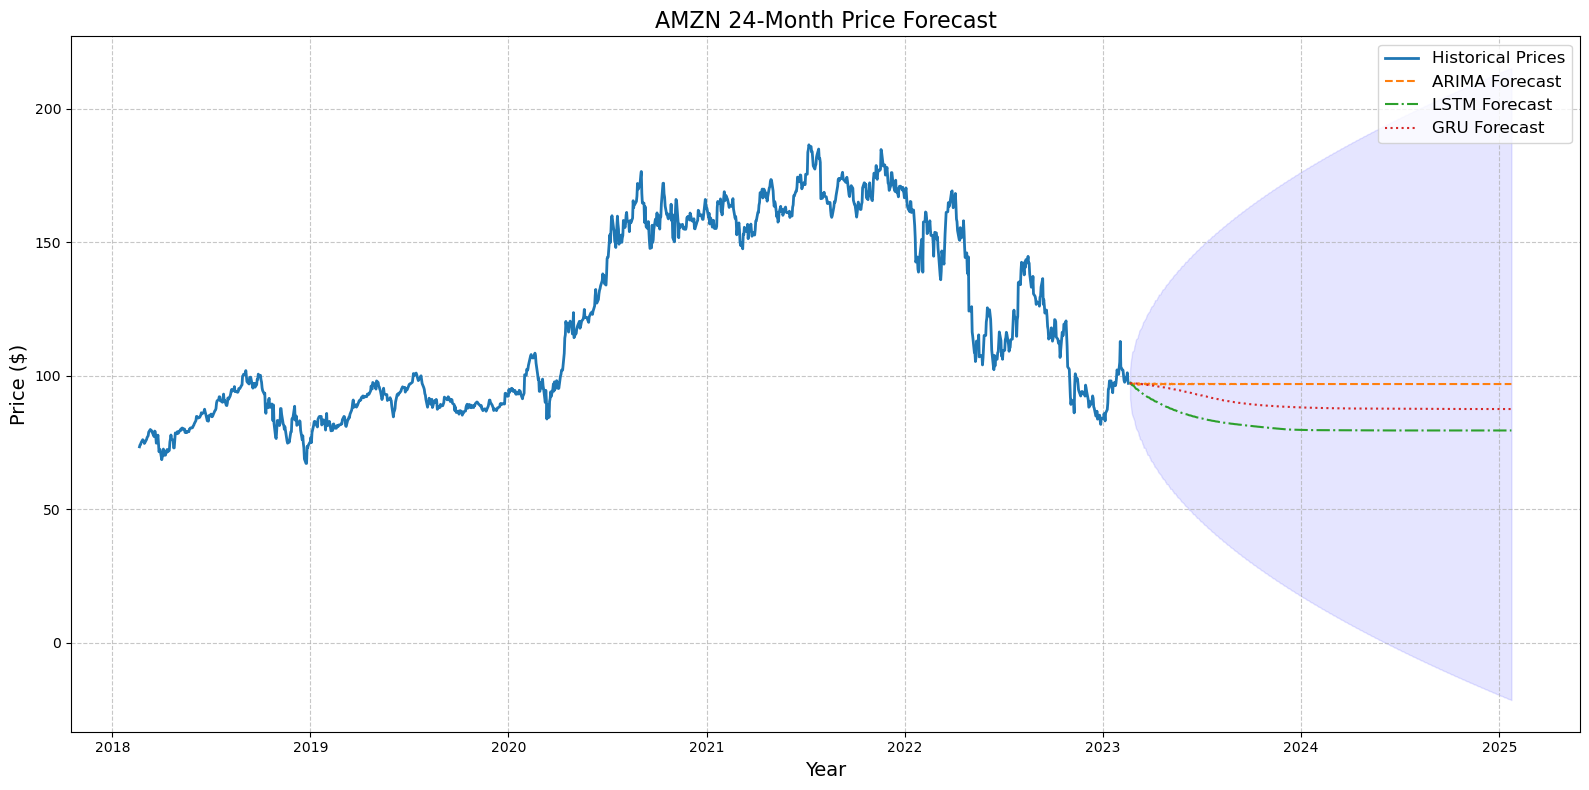

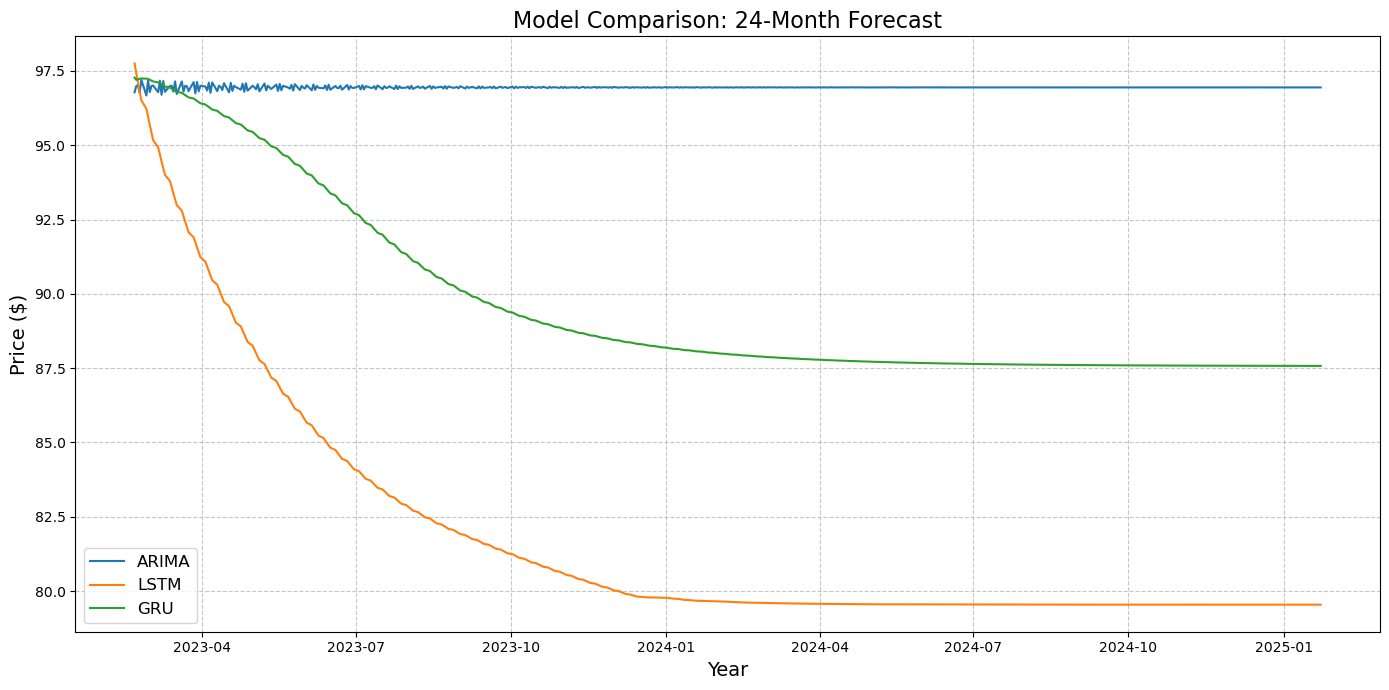

In [14]:
# Evaluate model performance on training data 
common_dates = df.index[n_steps:]
actual_common = df.Price.loc[common_dates]

# ARIMA
arima_pred_common = final_arima_results.fittedvalues.loc[common_dates]

# LSTM
lstm_train_pred = lstm_model.predict(X, verbose=0)
lstm_pred_common = scaler.inverse_transform(lstm_train_pred).flatten()

# GRU
gru_train_pred = gru_model.predict(X, verbose=0)
gru_pred_common = scaler.inverse_transform(gru_train_pred).flatten()

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics
mae_arima = mean_absolute_error(actual_common, arima_pred_common)
rmse_arima = np.sqrt(mean_squared_error(actual_common, arima_pred_common))
mape_arima = mean_absolute_percentage_error(actual_common, arima_pred_common)

mae_lstm = mean_absolute_error(actual_common, lstm_pred_common)
rmse_lstm = np.sqrt(mean_squared_error(actual_common, lstm_pred_common))
mape_lstm = mean_absolute_percentage_error(actual_common, lstm_pred_common)

mae_gru = mean_absolute_error(actual_common, gru_pred_common)
rmse_gru = np.sqrt(mean_squared_error(actual_common, gru_pred_common))
mape_gru = mean_absolute_percentage_error(actual_common, gru_pred_common)

# Create metrics table
metrics_data = {
    'Model': ['ARIMA', 'LSTM', 'GRU'],
    'MAE': [mae_arima, mae_lstm, mae_gru],
    'RMSE': [rmse_arima, rmse_lstm, rmse_gru],
    'MAPE': [f"{mape_arima:.4f}%", f"{mape_lstm:.4f}%", f"{mape_gru:.4f}%"]
}
metrics_df = pd.DataFrame(metrics_data)
print("\nTraining Performance Metrics (Common Period):")
print(metrics_df)

# Generate 24-month neural network forecasts
def generate_forecast(model, seed_data, steps):
    forecast = []
    current_batch = seed_data.reshape((1, n_steps, 1))
    
    for i in range(steps):
        next_pred = model.predict(current_batch, verbose=0)[0]
        forecast.append(next_pred)
        current_batch = np.append(current_batch[:,1:,:], [[next_pred]], axis=1)
    
    return scaler.inverse_transform(forecast)

# Generate forecasts
last_data = scaled_data[-n_steps:]
lstm_forecast = generate_forecast(lstm_model, last_data, forecast_steps)
gru_forecast = generate_forecast(gru_model, last_data, forecast_steps)

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), 
                            periods=forecast_steps, 
                            freq='B')

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'ARIMA': arima_mean.values,
    'LSTM': lstm_forecast.flatten(),
    'GRU': gru_forecast.flatten()
}).set_index('Date')

# Plot forecasts
plt.figure(figsize=(16, 8))

# Plot historical data
plt.plot(df.Price, label='Historical Prices', linewidth=2)

# Plot ARIMA forecast
plt.plot(forecast_df.index, forecast_df.ARIMA, label='ARIMA Forecast', linestyle='--')
plt.fill_between(forecast_df.index, 
                 arima_conf.iloc[:,0], 
                 arima_conf.iloc[:,1], 
                 color='blue', alpha=0.1)

# Plot LSTM forecast
plt.plot(forecast_df.index, forecast_df.LSTM, label='LSTM Forecast', linestyle='-.')

# Plot GRU forecast
plt.plot(forecast_df.index, forecast_df.GRU, label='GRU Forecast', linestyle=':')

plt.title('AMZN 24-Month Price Forecast', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot model comparison
plt.figure(figsize=(14, 7))
plt.plot(forecast_df.index, forecast_df.ARIMA, label='ARIMA')
plt.plot(forecast_df.index, forecast_df.LSTM, label='LSTM')
plt.plot(forecast_df.index, forecast_df.GRU, label='GRU')
plt.title('Model Comparison: 24-Month Forecast', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

